# Анализ оттока клиентов банка

**Входные данные:** Датасет содержит данные о клиентах банка. 

**Цель исследования:** Проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка, дать рекомендации.

**Описание данных:**
Файл `bank_scrooge.csv`:

* `USERID` — идентификатор пользователя,
* `score` — баллы кредитного скоринга,
* `city` — город,
* `gender` — пол,
* `age` — возраст,
* `equity` — количество баллов собственности
* `balance` — баланс на счёте,
* `products` — количество продуктов, которыми пользуется клиент,
* `credit_card` — есть ли кредитная карта,
* `last_activity` — активный клиент,
* `EST_SALARY` — оценочный доход клиента,
* `сhurn` — признак оттока

**Ход исследования:**
1. Изучение общей информации о датасете
2. Предобработка данных
3. Исследовательский анализ данных
4. Проверка статистических гипотез
5. Выделение сегментов клиентов банка
6. Презентация исследования
7. Общий вывод пл проекту и рекомендации


**Презентация:** https://drive.google.com/file/d/19yiGpp6jjZ43fu3PYimR0ap7rOxWujli/view?usp=sharing

## Шаг 1. Общая информация о датасете

* Произведем импорт необходимых библиотек

In [80]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import math as mth
from plotly import graph_objects as go
import plotly.express as px

* Прочитаем и сохраним датасет в переменную, выведем первые 15 строк для изучения структуры файла и размер датасета

In [81]:
try:
    data = pd.read_csv('bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
    
display(data.head(15))
print('Размерность датасета', data.shape)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.000,Рыбинск,Ж,25.000,1,"59,214.820",2,0,1,"75,719.140",1
1,146556,861.000,Рыбинск,Ж,37.000,5,"850,594.330",3,1,0,"86,621.770",0
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,"107,683.340",0
3,225363,866.000,Ярославль,Ж,51.000,5,"1,524,746.260",2,0,1,"174,423.530",1
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,"67,353.160",1
5,202305,856.000,Рыбинск,М,56.000,4,"863,687.240",3,1,0,"156,619.800",0
6,177259,807.000,Ярославль,Ж,39.000,3,"405,042.440",3,0,1,"103,838.320",0
7,218868,825.000,Ярославль,Ж,38.000,4,"458,145.400",2,1,1,"68,085.480",0
8,211686,923.000,Ярославль,М,54.000,5,"1,206,337.870",2,1,0,"155,371.790",0
9,133130,906.000,Ярославль,Ж,67.000,0,NaN,1,0,1,"238,055.530",0


Размерность датасета (10000, 12)


В датафрейме информация о 10 тысячах клиентов, характеризующиеся 12 параметрами, среди которых  являются булевыми: наличие кредитной карты у клиента, проявлял ли он активность в последнее время и собирается ли он покидать банк

* Изучим общую информацию о датасете (типы и количество непропущенных значений)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Идентификатор пользователя, эквити (оценка собственности клиента), колчество продуктов, имеется ли кредитная карта, активничал ли клиент в последнее время и является ли отточным - целочисленный тип данных (из них последние три - булевые). Есть только 2 строковых столбца - город и пол. Оставшиеся: скоринговый балл (оценка надежности клиента), возраст, баланс и зарплата - вещественные. В пункте предобработке данных возраст будет изменен с вещественного на целочисленный

* Характеристики числовых данных

In [83]:
pd.options.display.float_format ='{:,.3f}'.format # определяем формат отображения чисел
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.000","10,000.000","9,974.000","10,000.000","7,705.000","10,000.000","10,000.000","10,000.000","10,000.000","10,000.000"
mean,"171,814.713",848.699,42.734,2.628,"827,794.307",1.870,0.680,0.523,"147,866.886",0.182
std,"33,708.238",65.449,12.180,1.981,"1,980,614.147",0.793,0.466,0.499,"139,388.511",0.386
min,"94,561.000",642.000,18.000,0.000,0.000,0.000,0.000,0.000,"2,546.300",0.000
25%,"142,810.250",802.000,33.000,0.000,"295,554.160",1.000,0.000,0.000,"75,251.900",0.000
50%,"172,728.000",853.000,40.000,3.000,"524,272.200",2.000,1.000,1.000,"119,658.105",0.000
75%,"201,261.750",900.000,51.000,4.000,"980,705.850",2.000,1.000,1.000,"174,500.542",0.000
max,"229,145.000","1,000.000",86.000,9.000,"119,113,552.010",5.000,1.000,1.000,"1,395,064.450",1.000


1. Скоринговый балл (*шкала, статистическая модель - демографические признаки, кредитная история - с помощью которой банк определяет насколько высока вероятность, что заемщик вернет кредит в срок*) лежит в пределах 642-1000; средний 848.7, медианный 853 - разница не сильная, значит выбросов нет; лишь у менее чем 25% клиентов балл больше 900. 
2. Возраст клиентов в промежутке от 18 до 86, все клинеты банка совершеннолетние; средний возраст 42.7 года, медианный 40 лет; клиентов старше 51 года менее 25%
3. Эквити (*количетсво баллов собственности - на сколько оценивается собственность клиента*) находится от 0 до 9; среднее значение 2.6, медианное - 3. Менее, чем у 25% клиентов собственности нет вообще или она оценивается на 0, также у менее, чем 25% - эквити превышает 4 балла
4. На балансе у клиентов находится от 0 до 119 миллионов рублей; среднее 827 тысяч, медианное - 524 тысячи, присутствуют довольно большие выбросы. Менее чем у 25% клиентов на балансе больше 980 тысяч и также у 25% менее 295 тысяч. Явно надо будет поработать с выбросами, потомучто единичные огромные суммы на балансе могут исказить результаты анализа
5. По количетсву продуктов у пользователей в среднем по 2, однако минимальное значение - 0 - это какая-то аномалия иначе как этот клиент попал в базу. Наибольшее количество продуктов 5
6. Среднее по столбцу кредитной карты показывает долю клиентов, имеющих кредитку, таких 68%
7. Аналогично кредитке - активность клиента - лишь 52% клиентов проявляли в последнее время каукю-то активность, довольно маленькое число
8. Оценочный доход клиента в пределах от 2.5 тысяч до 1.4 миллонов; средний - 148 тысяч, медианный - 120 тысяч, у 25% клиентов доход больше 174.5 тысяч и у 25% ниже 75 тысяч 
9. Признак оттока - булевое - среднее показывает процент отточных клиентов - 18%

* Характеристика категориальных данных - город и пол

**Город**

In [84]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [85]:
# сводная таблица по количеству и долям клиентов в разрезе городов 

cnt_cities = pd.DataFrame(data.groupby('city')['USERID'].count().sort_values(ascending=False))
cnt_cities['rate'] = data.groupby('city')['USERID'].count().sort_values(ascending=False)/data['USERID'].count()*100
cnt_cities.columns=['cnt_users', 'rate']
cnt_cities

,cnt_users,rate
city,,
Ярославль,5888,58.880
Рыбинск,2695,26.950
Ростов,1417,14.170


Филиалы банка находятся в трех городах: Рыбинске, Ярославле и Ростове. Больше всего клиентов в отделении Ярославля, 59%, в Рыбинске в 2 раза меньше - 27%, а в Ростове всего 14%

**Пол**

In [86]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

In [87]:
# сводная таблица по количеству и долям клиентов в разрезе пола
cnt_gender = pd.DataFrame(data.groupby('gender')['USERID'].count().sort_values(ascending=False))
cnt_gender['rate'] = data.groupby('gender')['USERID'].count().sort_values(ascending=False)/data['USERID'].count()*100
cnt_gender.columns=['cnt_users', 'rate']
cnt_gender

,cnt_users,rate
gender,,
М,5005,50.050
Ж,4995,49.950


Два уникальных значения М и Ж, неявных дубликатов нет. Распределены поровну, по 50% мужчин и женщин

**Общая информация о датасете изучена, приступаем к предобработке**

## Шаг 2. Предобработка данных

### Названия столбцов

Названия столбцов в датасете надо привести к общепринятым норамам

In [88]:
data.columns

Index(['USERID', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'EST_SALARY', 'churn'],
      dtype='object')

Приведем названия в нижний регистр

In [89]:
data.columns = data.columns.str.lower()
data.head(0)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


В название столбца с уникальным идентификатором добавим еще нижнее подчеркивание

In [90]:
data.rename(columns={'userid':'user_id'}, inplace=True)

### Пропуски в данных

Посмотрим, какую долю занимают пропуски в каждом столбце, абсолютные значения:

In [91]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Проценты, доли пропусков от общего количества:

In [92]:
(data.isna().sum()/data.count()*100).sort_values(ascending=False)

balance         29.786
age              0.261
user_id          0.000
score            0.000
city             0.000
gender           0.000
equity           0.000
products         0.000
credit_card      0.000
last_activity    0.000
est_salary       0.000
churn            0.000
dtype: float64

Пропуски присутствуют только в двух столбцах:
* возраст - 0.26%,
* количество средств на балансе - 29.8%

Так как мы будем в дальнейшем делить клиентов на сегменты, там надо учитывать возраст, поэтому тут пропуски мы удалим, тем более их меньше процента

* **Пропуски в возрасте**


In [93]:
data = data.dropna(subset=['age'])

In [94]:
(data.isna().sum()/data.count()*100).sort_values(ascending=False)

balance         29.617
user_id          0.000
score            0.000
city             0.000
gender           0.000
age              0.000
equity           0.000
products         0.000
credit_card      0.000
last_activity    0.000
est_salary       0.000
churn            0.000
dtype: float64

* **Пропуски в балансе**

Изучим подробнее пропуски в балансах. Может быть, так отображается нулевой баланс, чтобы это узнать посмотрим есть ли в данных баланс со значением 0

In [95]:
data[data['balance']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.000,Ярославль,М,18.000,0,0.000,2,1,1,"64,548.330",0
6757,148456,813.000,Ярославль,М,20.000,2,0.000,2,1,0,"23,876.510",0


Таких клиентов всего 2, мужчины из Ярославля - это странно, навряд ли среди 10 тысяч клиентов только 2 с нулевым балансом, но возможно есть люди, которые на счете оставили копейки. Посмотрим еще на распределение отсутствующих значений баланса по отточным клиентам

In [96]:
data[data['balance'].isna()].groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,2266
1,13


Из всех пропусков уходящих клиентов толкьо 13, значит дело не в том, что их баланс решили удалить

In [97]:
data[data['balance'].isna()].describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,"2,279.000","2,279.000","2,279.000","2,279.000",0.000,"2,279.000","2,279.000","2,279.000","2,279.000","2,279.000"
mean,"171,904.886",865.357,42.093,0.051,NaN,1.163,0.815,0.549,"226,345.417",0.006
std,"33,303.215",89.554,11.942,0.227,NaN,0.404,0.388,0.498,"199,825.591",0.075
min,"114,182.000",642.000,18.000,0.000,NaN,0.000,0.000,0.000,"20,274.030",0.000
25%,"142,992.500",871.000,33.000,0.000,NaN,1.000,1.000,0.000,"120,217.385",0.000
50%,"172,304.000",903.000,40.000,0.000,NaN,1.000,1.000,1.000,"174,347.870",0.000
75%,"201,257.000",922.000,49.000,0.000,NaN,1.000,1.000,1.000,"240,372.775",0.000
max,"229,145.000",990.000,86.000,3.000,NaN,3.000,1.000,1.000,"1,333,687.360",1.000


Пропуски в балансе у клиентов, средний доход которых 226 тысяч, медианный 174 тысячи. Посмотрим на распределение зарплаты отсутствующих балансов

Text(0, 0.5, 'Количетсво клиентов')

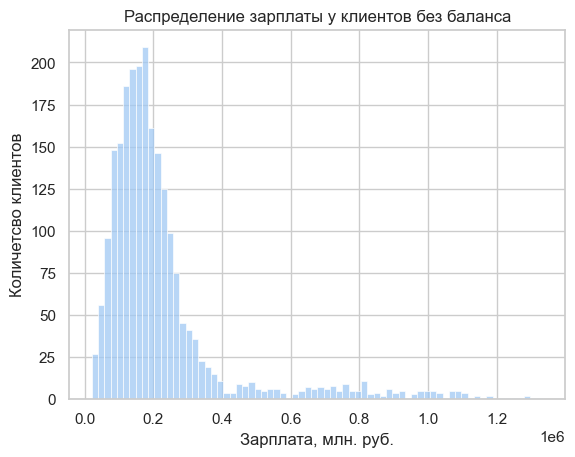

In [98]:
sns.histplot(data[data['balance'].isna()]['est_salary'])
plt.title('Распределение зарплаты у клиентов без баланса')
plt.xlabel('Зарплата, млн. руб.')
plt.ylabel('Количетсво клиентов')

В принципе в распределении зарплат людей с отсутствующим балансом нет ничего странного или выделяющегося

Пропуски в столбце с балансом оставим, так как денежные значения заполнять медианой или средним рисковано и некорректно, если бы нам были известны хотя бы их должности или еще какие-то параметры, то заполнили бы медианными значениями по этой должности. Тем более неизвестно почти в 30% случаев - это очень много

Посмотрим на распределение некоторых параметров у клентов с пропусками в балансе, возможно, там есть законномерности

* **Колчиество продуктов**

In [99]:
100*data[data['balance'].isna()]['products'].value_counts()/data[data['balance'].isna()]['user_id'].count()

products
1   84.862
2   13.822
3    1.272
0    0.044
Name: count, dtype: float64

Большинство клиентов, 84.9%, с пропуском баланса имеют 1 продукт банка. Из характеристик численных значений чуть выше известно, что среди таких пользователей 81.5% обладатели кредитных карт, возможно, этот один продукт - это и есть кредитка. Посмотрим еще на распределение эквити и баллов скоринга

* **Эквити**

In [100]:
100*data[data['balance'].isna()]['equity'].value_counts()/data[data['balance'].isna()]['user_id'].count()

equity
0   94.954
1    5.002
3    0.044
Name: count, dtype: float64

У 95% клиентов недвижимости нет, либо она не очень дорогая. Построим еще гистограмму баллов скоринга таких клиентов

* **Скоринг**

Text(0, 0.5, 'Количетсво клиентов')

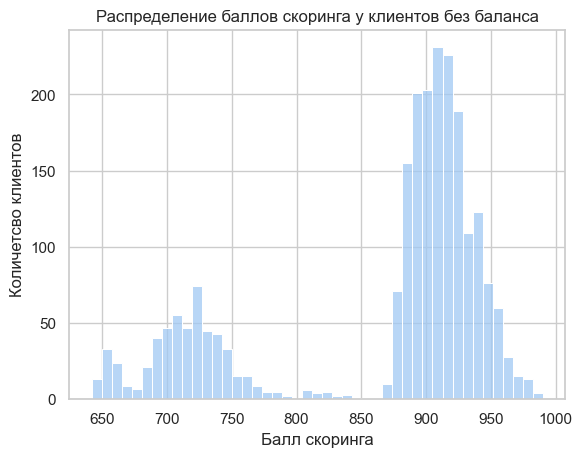

In [101]:
sns.histplot(data[data['balance'].isna()]['score'])
plt.title('Распределение баллов скоринга у клиентов без баланса')
plt.xlabel('Балл скоринга')
plt.ylabel('Количетсво клиентов')

У клиентов нет много дорогой собственности, а баллы скоринга достаточно высоки, возможно, за счет хорошей кредитной истории по кредитной карте эти баллы получаются. Посмотрим еще на возраст клиентов

Text(0, 0.5, 'Количетсво клиентов')

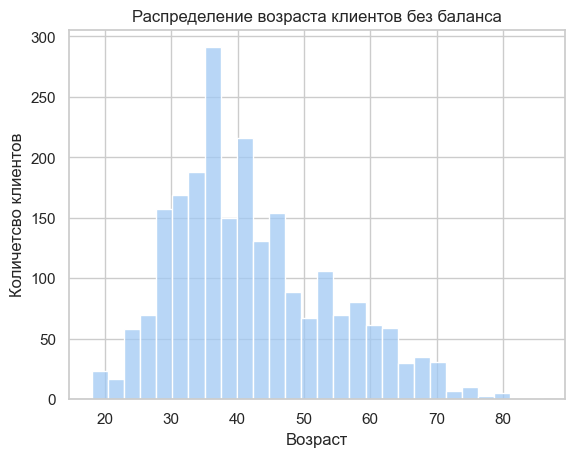

In [102]:
sns.histplot(data[data['balance'].isna()]['age'])
plt.title('Распределение возраста клиентов без баланса')
plt.xlabel('Возраст')
plt.ylabel('Количетсво клиентов')

In [103]:
data[data['balance'].isna()]['age'].value_counts().head(10)

age
36.000    104
33.000     99
37.000     97
35.000     90
32.000     89
34.000     89
31.000     80
40.000     78
42.000     78
38.000     76
Name: count, dtype: int64

Получается следующая закономерность: клиенты, у которых отсутствует баланс на счете в большинстве своем - люди 30-40 лет, у них нет ничего дорогово в собственности, однако есть кредитка нашего банка и, вероятно, хороший балл скоринга за ее счет, также они не собираются покидать банк

### Соответствие типов данных

При знакомстве с данными было замечено одно несоответсвие в типах - в возрасте - надо его перевести в целочисленный

In [104]:
data['age'] = data['age'].astype('int')

### Проверка на дубликаты

#### Проверка на полные дубликаты

In [105]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют

#### Проверка на дубликаты в идентификаторах клиентов

In [106]:
print('Количество дубликатов иденификаторов', data[['user_id']].duplicated().sum(),'\n')
print('Максимальное количетсво повторений айдишника\n', data['user_id'].value_counts().sort_values(ascending=False).head(),'\n')

Количество дубликатов иденификаторов 50 

Максимальное количетсво повторений айдишника
 user_id
195884    2
162053    2
120258    2
211130    2
227795    2
Name: count, dtype: int64 



Всего в данных повторяется 50 айдишников и максимально 2 вхождения. Посмотрим на данные клиентов с однаковыми айдишниками

In [107]:
dubl_id = data[data[['user_id']].duplicated(keep=False)].sort_values(by=['user_id', 'city', 'gender'])
dubl_id.head(50)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.000,Рыбинск,Ж,55,1,"362,756.490",3,0,1,"175,920.480",1
7694,116540,887.000,Ярославль,Ж,38,0,NaN,1,0,1,"119,247.610",0
4866,117943,855.000,Рыбинск,Ж,32,6,"1,036,832.930",4,1,1,"107,792.710",1
7542,117943,880.000,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.930",0
5863,120258,908.000,Рыбинск,Ж,38,4,"2,213,581.630",2,0,1,"160,327.770",1
5896,120258,905.000,Ярославль,М,30,0,NaN,1,1,1,"146,427.960",0
8638,123461,934.000,Рыбинск,М,34,0,NaN,2,1,0,"291,619.270",0
1411,123461,829.000,Ярославль,Ж,59,0,"96,222.440",2,0,1,"102,771.550",1
9775,124450,758.000,Рыбинск,Ж,36,0,"73,574.070",2,0,1,"79,963.590",0
8164,124450,859.000,Ярославль,Ж,38,6,"516,811.200",1,1,1,"95,144.630",1


In [108]:
dubl_id['city'].value_counts()

city
Рыбинск      50
Ярославль    50
Name: count, dtype: int64

В одном городе идентификаторы не повторяются, в каждом городе по 50 уникальных идентификаторов, видимо, произошел какой-то технический сбой, но наблюдается несколько закономерностей:
* у некоторых айдишников примерно схожие все основные параметры, но увеличилось количесво продуктов банка, на балансе появились деньги, а возраст стал больше. Видимо клиент обрашался в отделение банка в разных городах и было сформировано случайно несколько записей. Но объяснению разным полам тут нет
* так же есть айдишники, у которых пол разный и другие параметры довольно сильно отличается и далеко не близки (например клиенты с `user_id=164676`)
* также замечено, что у клиентов с одинаковым айдишником, не равны признаки оттока

Раз нам надо нарисовать портрет отточных клиентов, оставим среди дублей тех, кто является отточным. Удаление еще 50 строк не является критичным на фоне исходных 10 тысяч. И из всего датафрейма, полученного выше оставим только столбец с уникальными идентификаторами

In [109]:
dubl_id = dubl_id.query('churn==0')
dubl_id.reset_index(inplace=True)
# сбрасываю индексы, чтобы в дальнейшем удалить строки с этими индексами из основного датасета, указав на них через эту колонку

Удаляю строки датафрейма с ненужными, повторяющимися идектификаторами, с помощью сериеса индексных меток, полученных выше при сбрасывании индексов

In [110]:
data.drop(dubl_id['index'], inplace=True) 
data[['user_id']].duplicated().sum()

0

Повторов идентификаторов не осталось.

### Проверка на аномалии в количестве продуктов банка

Клиент попадает в базу только, когда приобретает какой-то товар банка: кредитная карта, кредит и прочие. Посмотрим, как количетсво продуктов распределено по клиентам

In [111]:
cnt_prods = pd.DataFrame(data['products'].value_counts())
cnt_prods['rate of all'] = data['products'].value_counts()/data['user_id'].count()*100
cnt_prods

,count,rate of all
products,,
2,5095,51.340
1,3306,33.313
3,1029,10.369
4,474,4.776
5,19,0.191
0,1,0.010


Более 50% клиентов имеют 2 продукта банка, у 33%  - 1 продукт, 10% имеют 3 продукта, меньше 5% - 4 продукта, лишь у 19 человек обладают 5 продуктами и каким-то образом в данных появился клиент без единого продукта банка - это какая-то аномалия, посмотрим на его характеристики

In [112]:
data[data['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.000,Рыбинск,Ж,79,3,NaN,0,0,0,"25,063.960",1


Это пожилая женщина с доходом 25 тысяч, на балансе у нее, понятное дело, отсутствуют средства и судя по признаку оттока - она собирается покидать банк. Удалим ее из данных

In [113]:
data = data[data['products']!=0]

In [114]:
data[data['products']==0]['user_id'].count()

0

### Кодирование данных

Для дальнейшего корреляционного анализа нам необходимо к категориальным неупорядоченным переменным применить one-hot кодирование. Воспользуемся `pandas.get_dummies` к столбцам пола и городов, также сделаем копию столбцов, которые собираемся категоризировать

* Кодирование пола

In [115]:
gender = data['gender'].copy()
data = pd.get_dummies(data, columns=['gender'])
data.insert(3, value=gender, column='gender')

Как итог получаем следующие новые колонки датафрейма:

In [116]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,True,False
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,True,False
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,True,False
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,True,False
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,False,True


* Проделаем аналогичное с городами

In [117]:
city = data['city'].copy()
data = pd.get_dummies(data, columns=['city'])
data.insert(2, value=city, column='city')

Итоговый датафрейм:

In [118]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_Ж,gender_М,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.000,Рыбинск,Ж,25,1,"59,214.820",2,0,1,"75,719.140",1,True,False,False,True,False
1,146556,861.000,Рыбинск,Ж,37,5,"850,594.330",3,1,0,"86,621.770",0,True,False,False,True,False
2,120722,892.000,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.340",0,True,False,False,True,False
3,225363,866.000,Ярославль,Ж,51,5,"1,524,746.260",2,0,1,"174,423.530",1,True,False,False,False,True
4,157978,730.000,Ярославль,М,34,5,174.000,1,1,0,"67,353.160",1,False,True,False,False,True


Теперь данные готовы к дальнейшему анализу

**Вывод по блоку предобработки:**

* были преобразованы наименования столбцов в единый вид
* удалены клиенты с пропуском в возрасте (2.6%)
* для пропусков в балансе была выявлена закономерность: чаще всего их имеют неотточные клиенты в возрасте 30-40 лет, у которых есть кредитка банка и у них хорошая кредитная история - большие баллы скоринга, а также нет дорогого имущества
* тип данных возраста был преобразован к целочисленному
* была произведена обработка дубликатов и устранены ненужные дубликат
* была выявлена аномалия в количестве продуктов - 0 штук - клиент был удален из датасета
* также было произведено кодирование данных: пол и город
    
</div> 


## Шаг 3. Анализ данных

Зададим стиль последующих диаграмм и графиков

In [119]:
sns.set_theme(style="whitegrid", palette="pastel")

Напишем функцию для категориальных переменных (город, пол, наличие кредитки, активность клиента)

In [120]:
def barplot_in_churn(param):
    
    # сводная таблица в разрезе параметра и признака оттока с количеством и долей от всех по параметру
    
    # сначала группируем данные по параметру и признаку оттока, считаем колчиество пользователей по ним,
    group = data.groupby([param, 'churn']).agg({'user_id':'count'}).reset_index()
    # затем присоединяем столбец с количетсвом клиентов по параметру вообще
    group = group.merge(data.groupby(param)['user_id'].count(), how='left', on=param)
    # переименовываем колонки для удобства
    group.columns=[param, 'churn', 'churn_users', 'cnt_users']
    # находим долю отточных и неотточных клиентов по параметру
    group['rate'] = group['churn_users']/group['cnt_users']*100
    display(group)
    
    # построение столбчатой диаграммы
    plt.figure(figsize=(10,7))
    bar = sns.barplot(data=group, x=param, y='rate', hue='churn')
    plt.xlabel('')
    plt.ylabel('% клиентов')
    plt.title(f'Столбчатая диаграмма по {param} и признаку оттока')
    plt.show()
    
    return bar

In [121]:
def box_hist(param, label, bins='auto', kde=True):
    
    plt.figure(figsize=(20, 9))
    
    sns.boxplot(data=data, y=param, x='churn', ax=plt.subplot(1,3,1))
    plt.xlabel('Признак оттока')
    plt.ylabel(label)
#     plt.ylim(ylim)
    plt.title('Диаграмма размаха')

    sns.histplot(data=data, x=param, hue='churn', bins=bins, kde=kde, stat="density", common_norm=False, ax=plt.subplot(1,3,(2,3)))
    plt.ylabel('Плотность вероятности (доля клиентов с определенным значением)')
    plt.xlabel(label)
#     plt.xlim(xlim)
    plt.title('Гистограмма')

    plt.show()

### Корреляция показателя оттока от других показателей

Построим тепловую карту для корреляции показателя оттока с другими признаками, для этого:
1. удалю сначала из имеющегося датафрейма строковые столбцы, 
2. по получившемуся построю матрицу корреляции и возьму от туда только один целевой столбец - признак оттока, 
3. далее отсортирую имеющиеся коэффициенты по убыванию
4. и удалю первую строчку (где значение единица - корреляция с самим собой), чтобы не искажало сильно цвета на тепловой карте

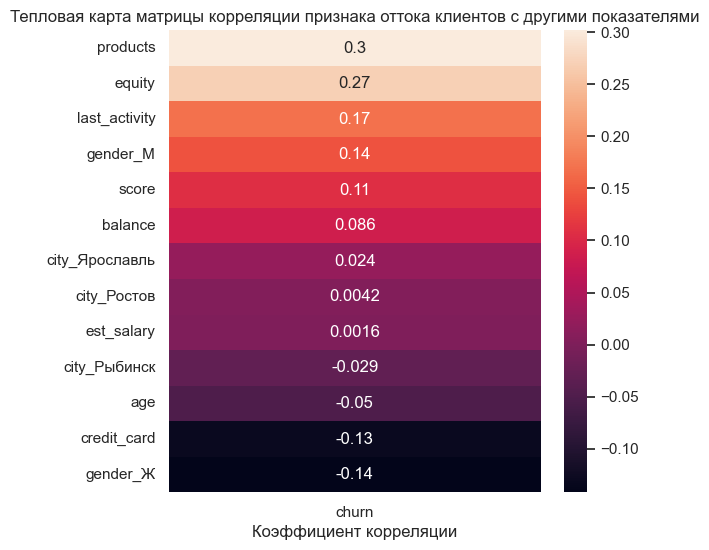

In [122]:
plt.figure(figsize=(6,6))
sns.heatmap(pd.DataFrame(data
                         .drop(columns=['city', 'gender', 'user_id'])
                         .corr()['churn']
                         .sort_values(ascending=False)
                         .iloc[1:]), 
            annot=True)
plt.title('Тепловая карта матрицы корреляции признака оттока клиентов с другими показателями')
plt.xlabel('Коэффициент корреляции')
plt.show()

Судя по диаграмме выше можно сказать, что отточность клиентов зависит в большей степени от:
* количества имеющихся продуктов - 30% - может быть клиенты набрали кредитов и хотят уйти от банка
* эквити клиента - 27% - люди с большим колчиеством собственности являются оттоковыми
* имел ли активность клиент в последнее время - 17% - наеврно, то, что клиент заявил банку, что хочет закрыть там счета - считается его активностью
* пола: мужчины - 14% - чаще относятся к отточным клиентамм, чем женщины (поэтому у женского пола такое же значение, но отрицательная - обратная зависимость)
* баллы скоринга - 11% - клиенты с большими баллами чаще хотят покинуть банк

Обратная зависимость у женского пола, как было сказано выше и показателя обладания кредитной картой - 14% - имение кредитки у клиента способствует удержанию его в банке

### Портрет клиентов банка в разрезе признаков оттока

Посмотрим распределение переменных в разрезе признака оттока. 
#### Распределение отточных и неотточных клиентов

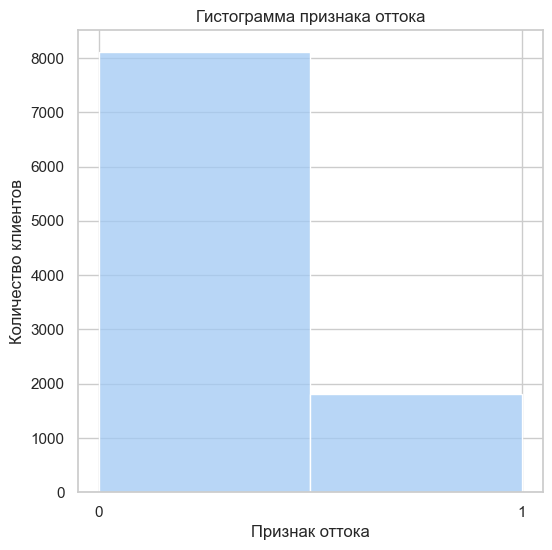

In [123]:
plt.figure(figsize=(6,6))
sns.histplot(data=data, x='churn', bins=2)
plt.xticks(data['churn'].unique())
plt.xlabel('Признак оттока')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма признака оттока')
plt.show()

In [124]:
print(f'Доля отточных: {round(data["churn"].mean()*100, 2)}%')
print(f'Доля отсающихся: {100-round(data["churn"].mean()*100, 2)}%')

Доля отточных: 18.32%
Доля отсающихся: 81.68%


Всего отточных клиентов около 2 тысяч человек, что составляет 18.32%, не собирается уходить более 8 тысяч человек - 81.68%

Рассмотрим распределения параметров в разреде признака отточности

#### Разпределение городов в разрезе оттока

Вызовем функцию, написанную ранее и посмотрим на сводную таблицу: города, признак оттока, количетсво клиентов в городе с соответствующим признаком, общее количетсво клиентов в городе и доля, которую занимают клиенты города по признаку оттока

,city,churn,churn_users,cnt_users,rate
0,Ростов,0,1151,1416,81.285
1,Ростов,1,265,1416,18.715
2,Рыбинск,0,2217,2653,83.566
3,Рыбинск,1,436,2653,16.434
4,Ярославль,0,4737,5854,80.919
5,Ярославль,1,1117,5854,19.081


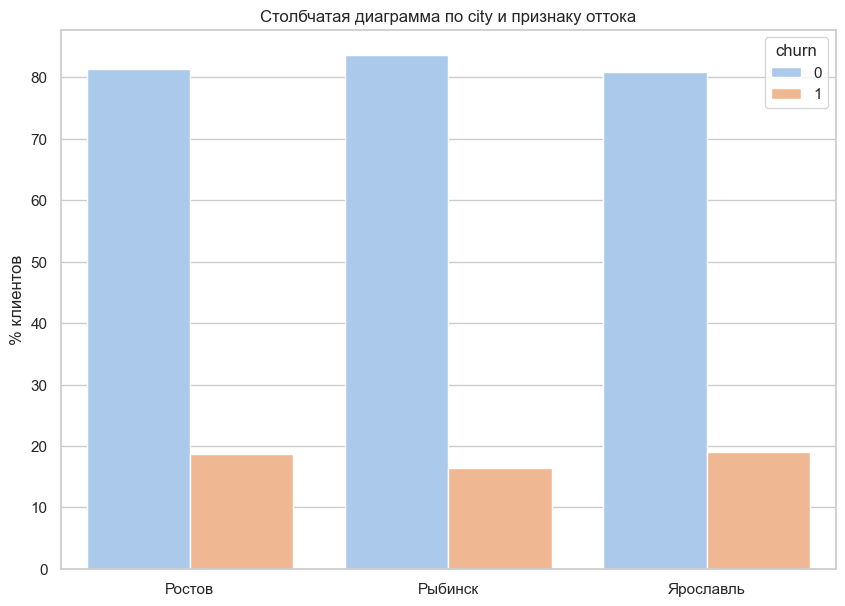

<Axes: title={'center': 'Столбчатая диаграмма по city и признаку оттока'}, ylabel='% клиентов'>

In [125]:
barplot_in_churn('city')

Доли отточных клиентов распределены по городам одинаково, везде в районе 16%-19%, наибольший в Ярославле - 19%, наименьший в Рыбинске - 16%. Посмотрим на похожее распределение по полу.

#### Пол клиентов в разрезе оттока

,gender,churn,churn_users,cnt_users,rate
0,Ж,0,4317,4952,87.177
1,Ж,1,635,4952,12.823
2,М,0,3788,4971,76.202
3,М,1,1183,4971,23.798


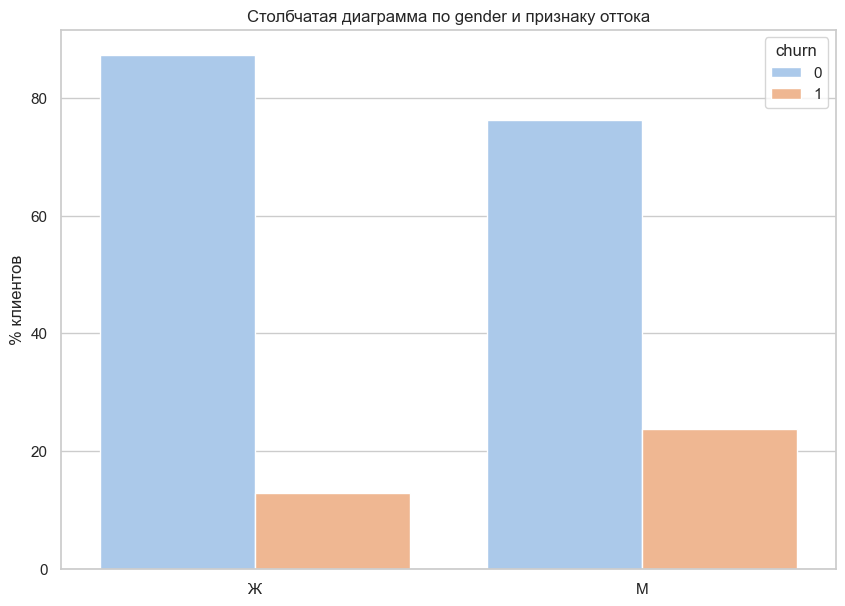

<Axes: title={'center': 'Столбчатая диаграмма по gender и признаку оттока'}, ylabel='% клиентов'>

In [126]:
barplot_in_churn('gender')

Тут уже конкретно заметно, что доля отточных мужчин - 24% больше, чем отточных женщин - 13%

#### Возраст клиентов в разрезе оттока

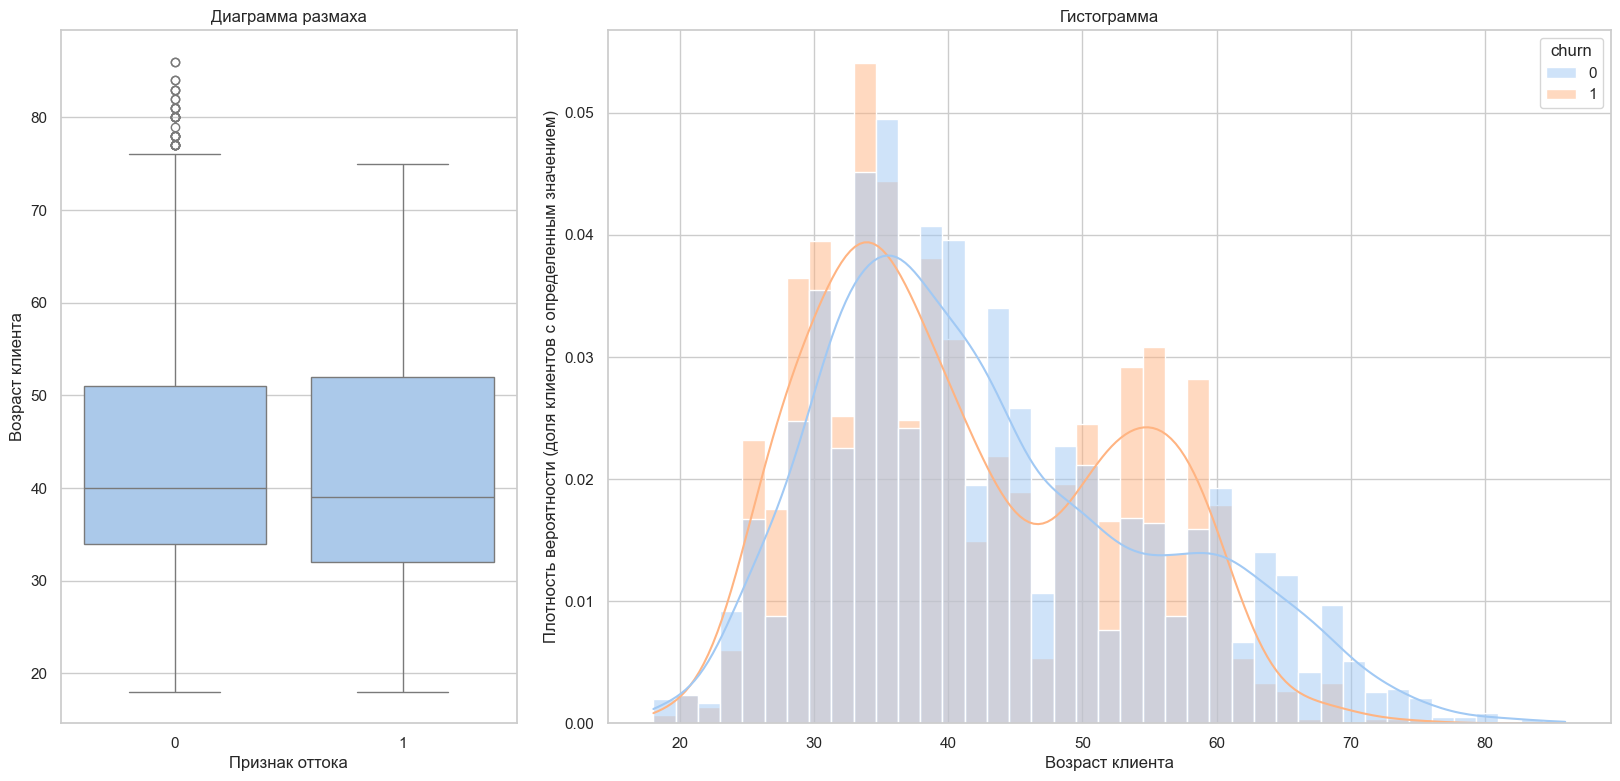

In [127]:
box_hist('age', 'Возраст клиента')

Клиенты в возрасте 18-25, 36-50 и старше 60 (60-86) не склонны к уходу из банка. Однако в люди в возрастах 25-35 и 50-60 чаще имеют признак оттока

#### Баллы скоринга в разрезе признака оттока

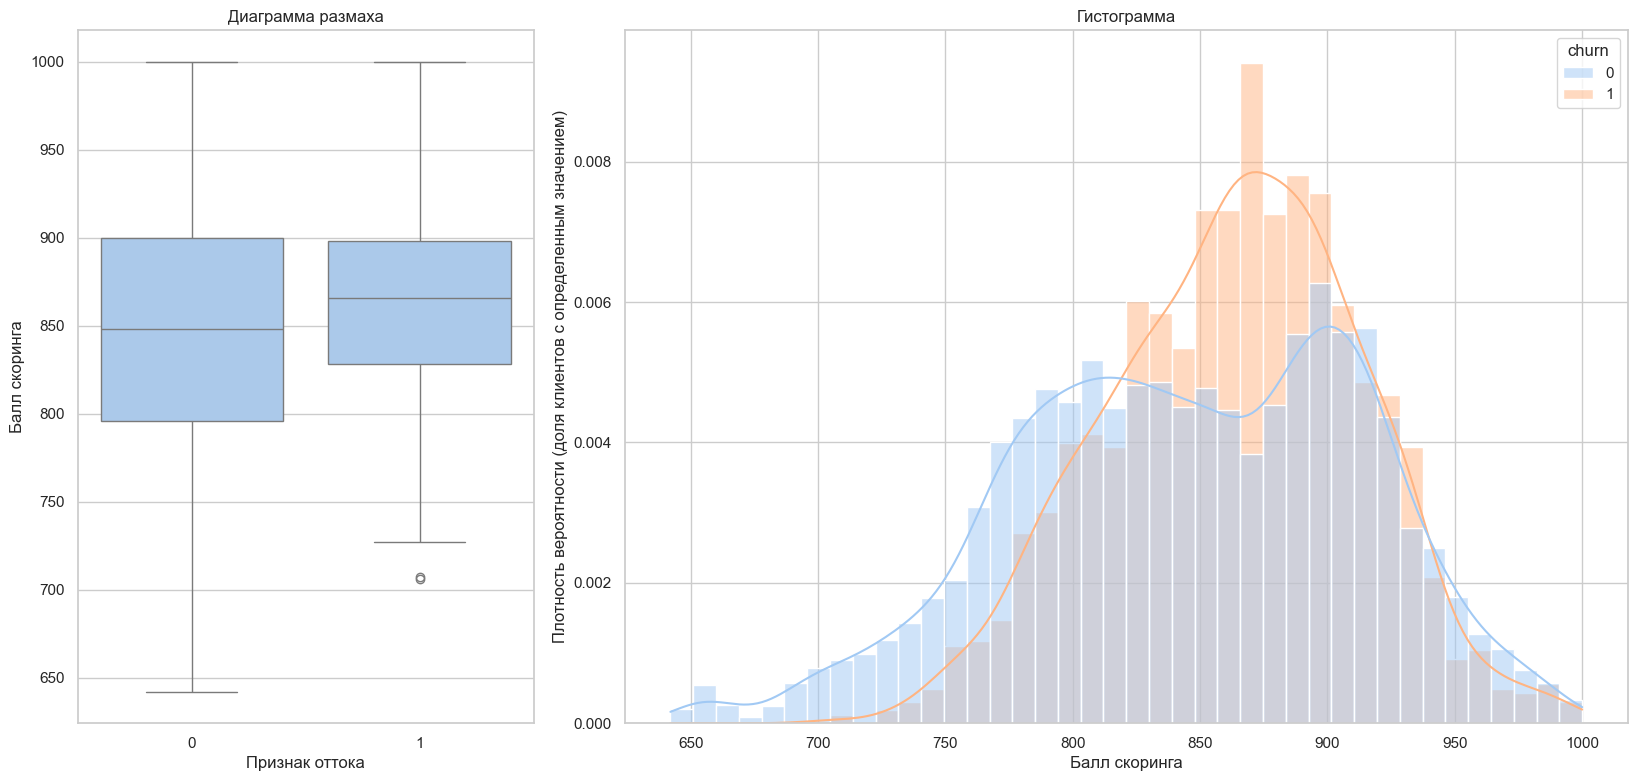

In [128]:
box_hist('score', "Балл скоринга")

Выбросов больших нет. Медианная надежность клиентов, склонных к оттоку больше, их типичный балл 870 и межквартальных размах наммного уже неотточных клиентов. Судя по гистограмме, неотточные клиенты имеют балл ниже отточных на промежутке от 650 до 825, правда есть небольшая часть клиентов со скорингом больше 940, где скоринг отточных проседает. Доля отточных клиентов с хорошей надежностью, 825-900, сильно больше доли клиентов клиентов, которые не собираются уходить.

#### Эквити в разрезе признака оттока

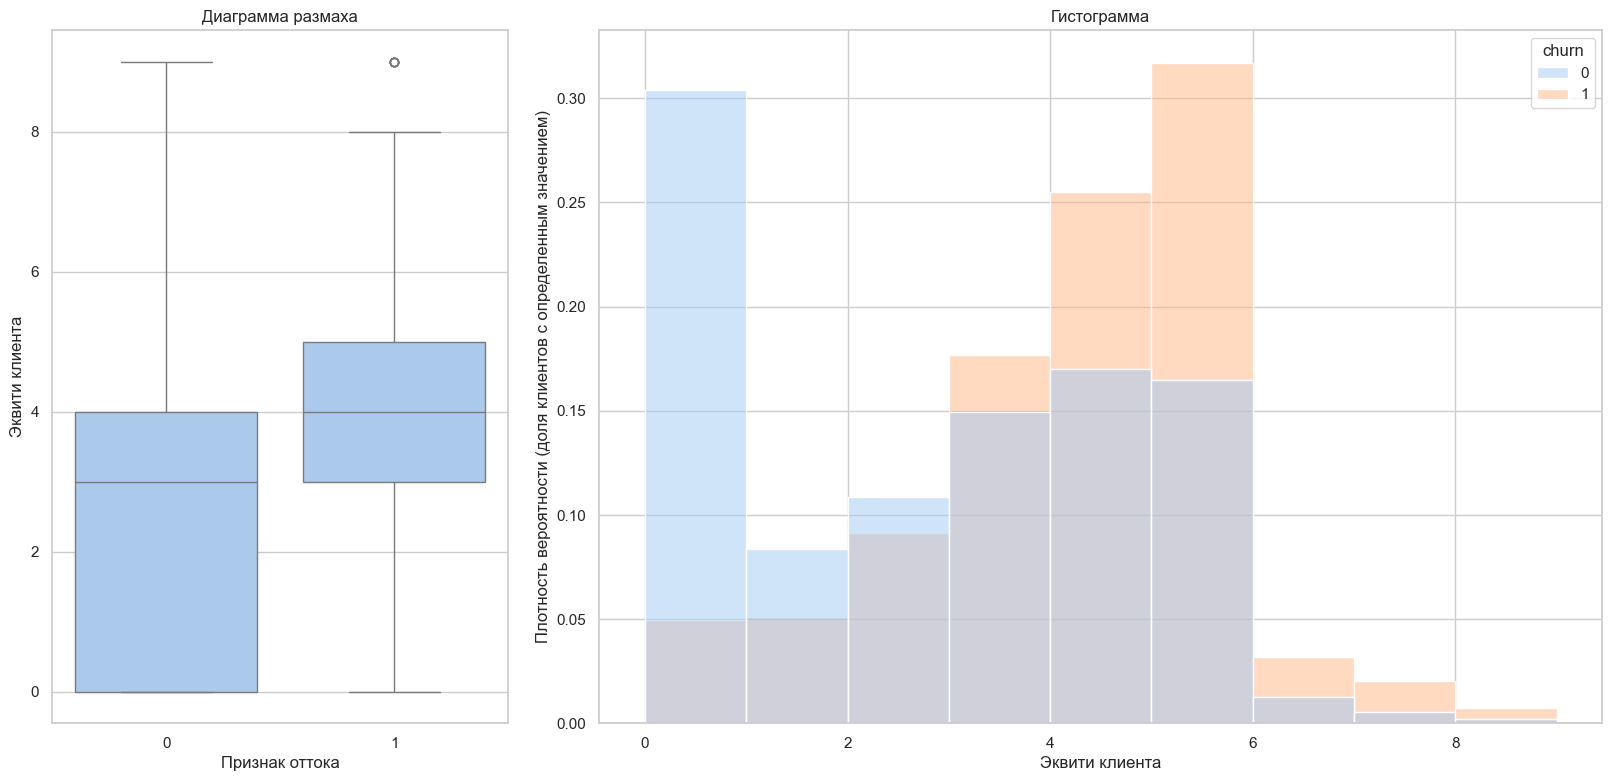

In [129]:
box_hist('equity', 'Эквити клиента', bins=9, kde=False)

Выбросов больших нет, для остающихся клиентов нормальные значения - это все имеющиеся, межквартальный размах широкий (0-4), Гистограмма показывает, что наибольшие эквити 3-9 имеют отточные клиенты, их доля от всех оттоковых клиентов больше, чем доля неоттоковых клиентов от своей численности. Эквити клиентов, которые не собираеются уходить, преобладают на интервале оценки 0-2.

#### Баланс на счету в разрезе признака оттока

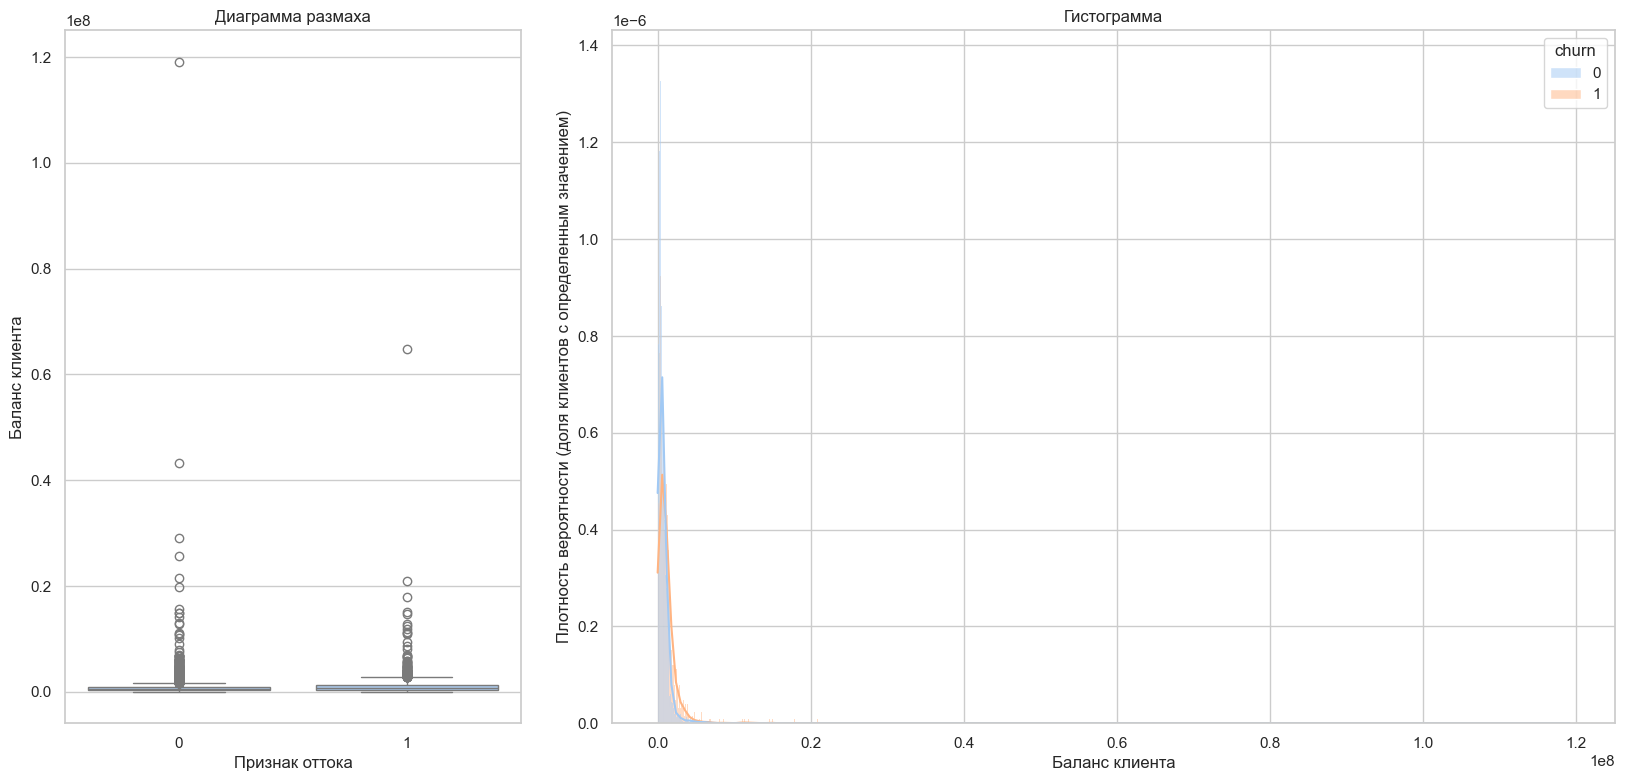

In [130]:
box_hist('balance', 'Баланс клиента')

Баланс имеет очень сильные выбросы, поэтому надо ограничить оси

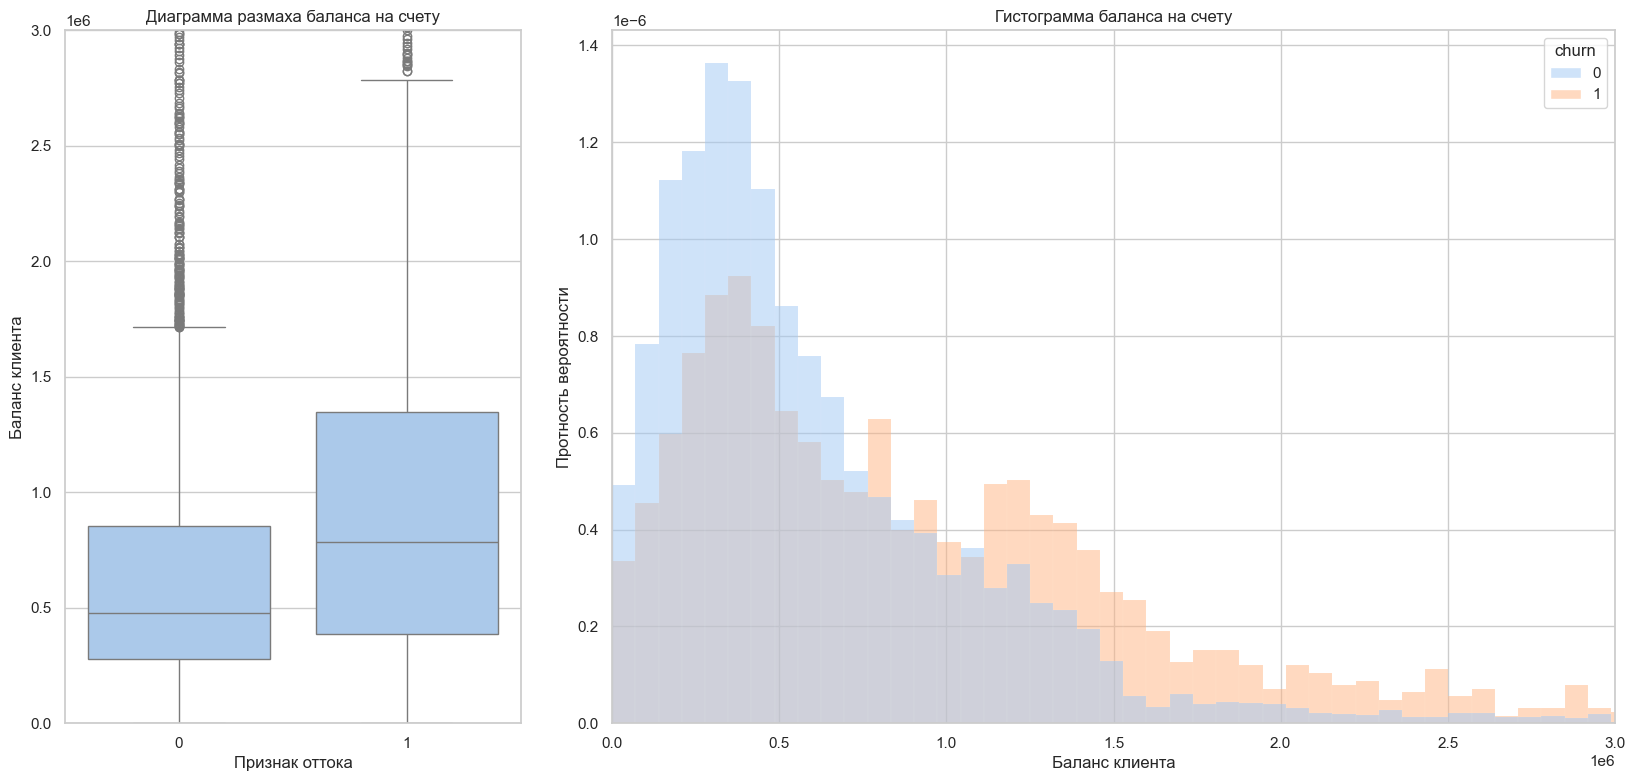

In [131]:
plt.figure(figsize=(20, 9))

sns.boxplot(data=data, y='balance', x='churn', ax=plt.subplot(1,3,1))
plt.ylim(0,3000000)
plt.xlabel('Признак оттока')
plt.ylabel('Баланс клиента')
plt.title('Диаграмма размаха баланса на счету')

sns.histplot(data, x='balance', hue='churn', stat="density", common_norm=False, ax=plt.subplot(1,3,(2,3)))
plt.xlim(0,3000000)
plt.xlabel('Баланс клиента')
plt.ylabel('Протность вероятности')
plt.title('Гистограмма баланса на счету')

plt.show()

Клиенты, которые собираются уходить чаще имеют на балансе крупные суммы - 800 тысяч, в то время, как клиенты, не собирающиеся покидать банк, хранят на счету чаще до 800 тысяч. Но надо учитывать, что мы оставили пустые значения баланса незаполненными, посмотрим как они распределены по признаку отточности

In [132]:
data[data['balance'].isna()].groupby('churn')['user_id'].count()

churn
0    2247
1      12
Name: user_id, dtype: int64

Почти все пропуски, 2.2 тысячи, за исключением 12 штук, - это клиенты, которые не собираются покидать банк, оставим пропуски, как есть, ведь нас интересуют отточные клиенты, которых тут единицы

#### Количество продуктов банка в разрезе признака оттока

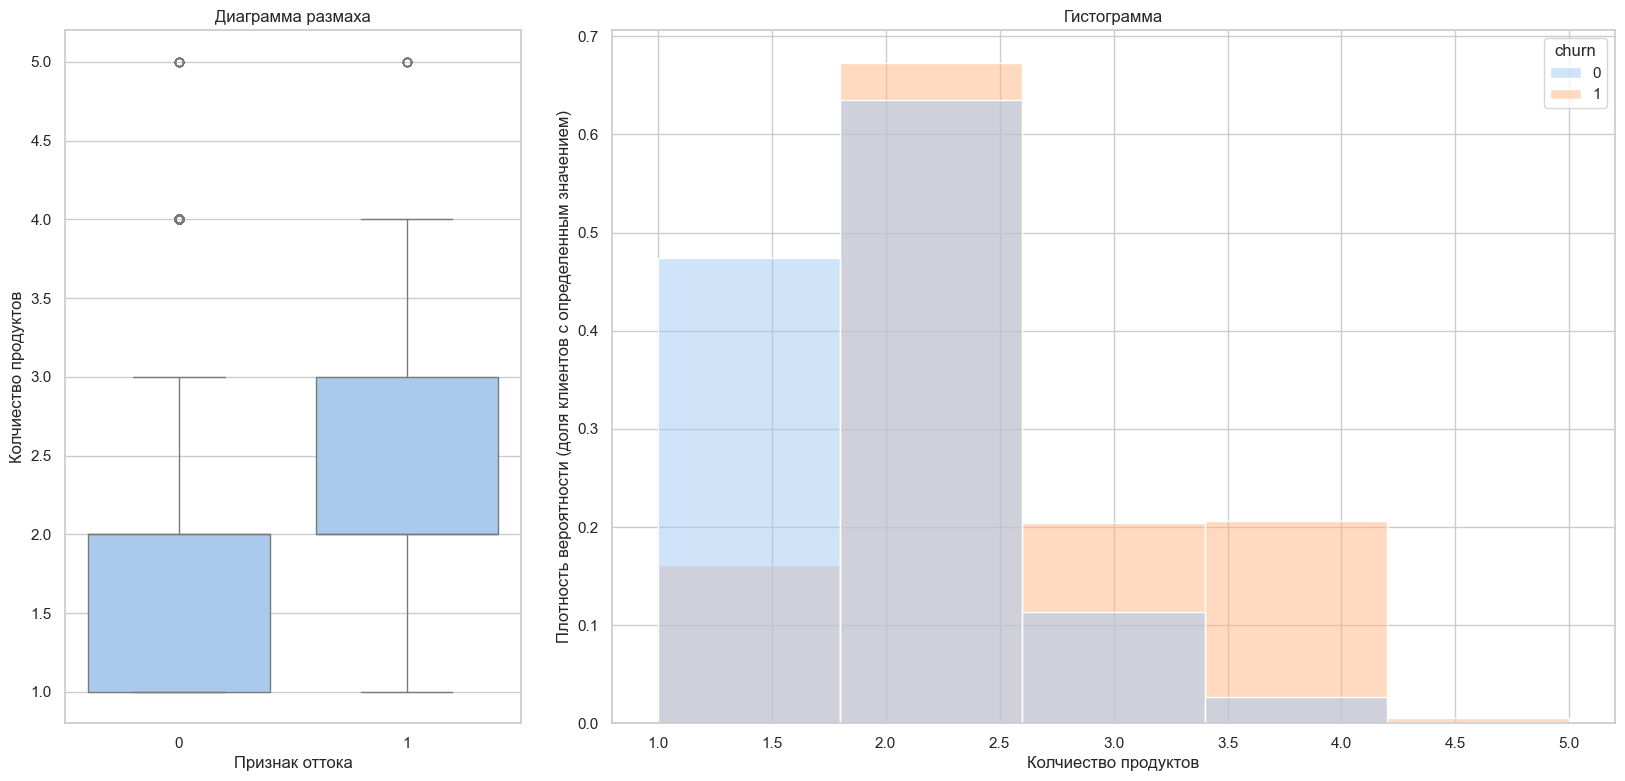

In [133]:
box_hist('products', 'Колчиество продуктов', bins=5, kde=False)

Склонны к оттоку кленты банка с количеством продуктов больше 1, вероятность больше, что клиент остается в банке только у клиентов с одним продуктом

#### Наличие кредитной карты в разрезе признака оттока

Посмотрим доли клиентов в каждой группе (отточные и неотточные), у которых есть кредитная карта и нет ее. Для начала узнаем, у скольки вообще клиентов есть кредитная карта

,credit_card,churn,churn_users,cnt_users,rate
0,0,0,2360,3175,74.331
1,0,1,815,3175,25.669
2,1,0,5745,6748,85.136
3,1,1,1003,6748,14.864


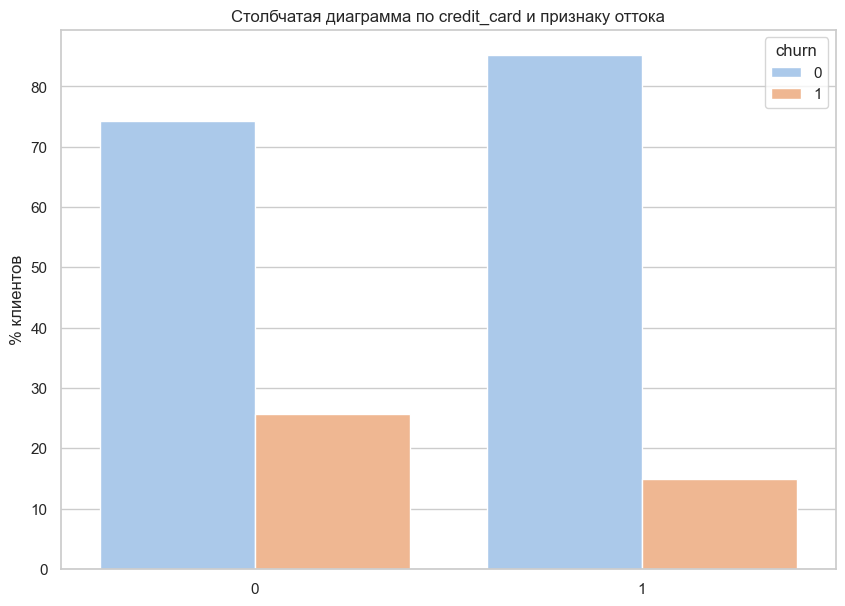

<Axes: title={'center': 'Столбчатая диаграмма по credit_card и признаку оттока'}, ylabel='% клиентов'>

In [134]:
barplot_in_churn('credit_card')

Распределение в разрезе наличия кредитной карты и признака оттока показывает, среди пользователей кредитной карты доля отточных клиентов меньше почти в 2 раза, нежели пользователей, у которых нет кредится.

#### Активность клиента в разрезе признака оттока

,last_activity,churn,churn_users,cnt_users,rate
0,0,0,4188,4729,88.560
1,0,1,541,4729,11.440
2,1,0,3917,5194,75.414
3,1,1,1277,5194,24.586


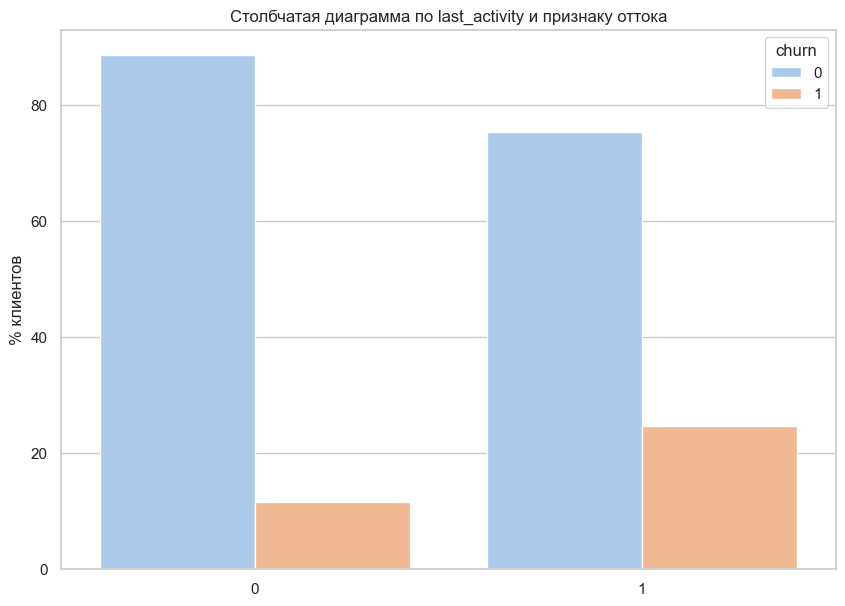

<Axes: title={'center': 'Столбчатая диаграмма по last_activity и признаку оттока'}, ylabel='% клиентов'>

In [135]:
barplot_in_churn('last_activity')

Отточные клиенты чаще были активны в последнее время, чем не активны, а клиенты, которые не собираются покидать банк - не проявляли активности никакой

#### Доход клиентов в разрезе признака оттока

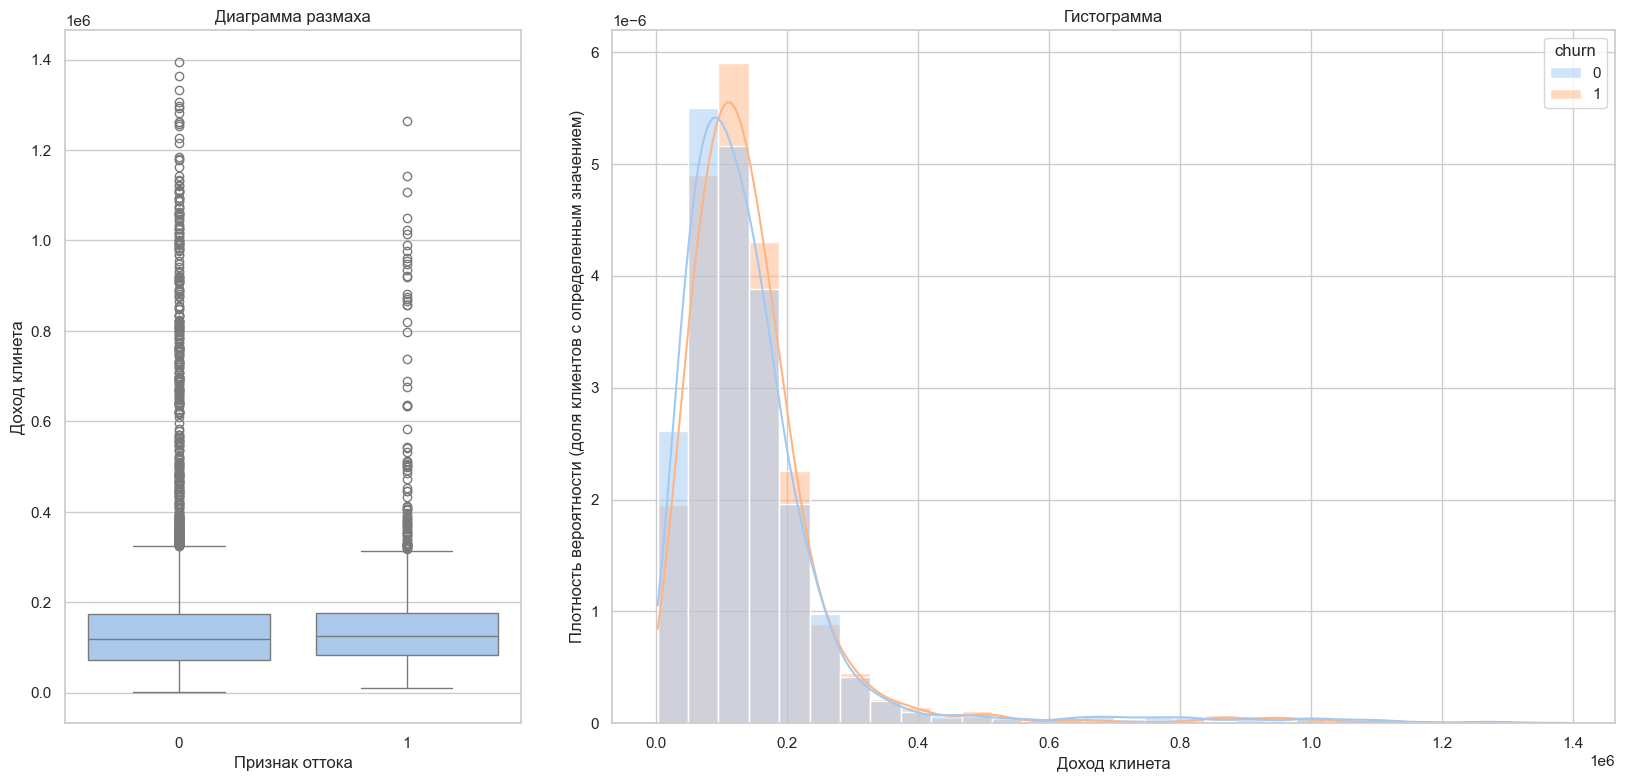

In [136]:
box_hist('est_salary', 'Доход клинета', bins=30)

Значения дохода имеют много выбросов и имеют похожее распределение, однако клиенты, собирающиеся уходить имеют чуть больший. Попробуем ограничить значения оси Х до 400 тысяч, чтобы ближе рассмотреть значения

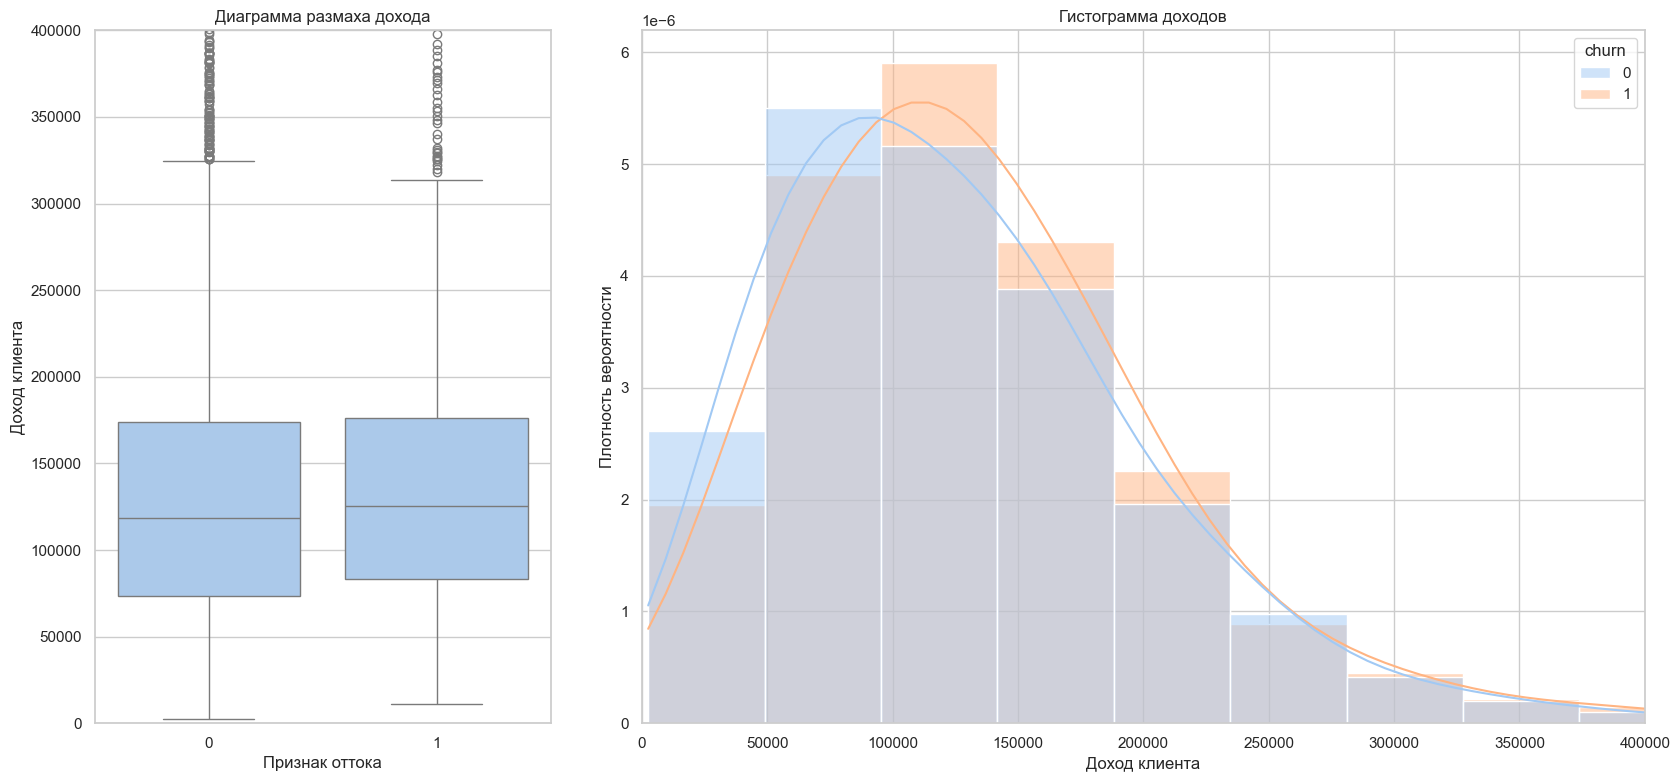

In [137]:
plt.figure(figsize=(20, 9))

sns.boxplot(data=data, y='est_salary', x='churn', ax=plt.subplot(1,3,1))
plt.xlabel('Признак оттока')
plt.ylabel('Доход клиента')
plt.ylim(0,400000)
plt.title('Диаграмма размаха дохода')

sns.histplot(data, x='est_salary', hue='churn', bins=30, kde=True, stat="density", common_norm=False, ax=plt.subplot(1,3,(2,3)))
plt.xlabel('Доход клиента')
plt.ylabel('Плотность вероятности')
plt.xlim(0,400000)
plt.title('Гистограмма доходов')

plt.show()

Клиентов до 100 тысяч все устраивает и они не собираются покидать банк. Клиенты с доходом от 100 до 230 тысяч союираются уходить чаще. Доли отточных и неотточных клиентов, имеющих доход более 250 тысяч, примерно равны

**Вывод по блоку анализа - портрет клиентов**

* Доля отточных клиентов составляет 18%. 

* Однако мужчины чаще являются отточными клиентами, в отличие от женщин. 

* Отточные клиенты в возрасте 25-35, 50-60 лет, неотточные 18-25, 35-50, и 60+

* Отточные клиенты имеют достаточно большой балл скоринга: 825-930, бОльшие доли клиентов за пределами этого промежутка - неотточные

* Эквити отточных клиентов преобладает на 3+ баллах, а неотточные до 0-2

* Доли клиентов, имеющих баланс свыше 750 тысяч, больше у отточных

* Неотточные клиенты в большинстве имеют 1 продукт банка, доли клиентов с 2+ продуктами больше у неотточных

* Чаще всего клиенты без кредитной карты собираются покидать банк

* Доходы от 100 до 225 тысяч чаще у неотточных, в остальных случаях доля больше у отточных

## Шаг 4. Проверка гипотез

Проверим несколько статистических гипотез двух выборок: отточные клиенты и неотточные клиенты по раздичным параметрам, таким как зарплата, баллы скоринга и баллы собственности

Так как выборки у нас разного размера, то установим параметр `equal_var=False`, указывая, что равенство дисперсий выборок под сомнением

### Гипотеза о различии дохода между клиентами, которые ушли и теми, которые остались

Сформулируем первую пару гипотез (двусторонние):
* **Н0:** "У отточных и неотточных клиентов средний доход равен"
* **Н1:** "У отточных и неотточных клиентов средних доход разный"

Уровень статистической значимости возьмем 0.005 (0.5%) - этой вероятности различия значимости средних доходов достаточно, чтобы считать их разными

In [138]:
salary_churn = data.query('churn==1')['est_salary']
salary_not_churn = data.query('churn==0')['est_salary']

alpha=0.005

results=st.ttest_ind(salary_churn, salary_not_churn, equal_var=False)

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу, доходы отточных и неотточных клиентов равны')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве доходов двух групп')


p-значение: 0.8626784591490475
Не получилось отвергнуть нулевую гипотезу о равенстве доходов двух групп


Нулевая гипотеза о равенстве средних зарплат не отвергнута, значение p-value больше уровня статистической значитмости, что означает значимых различий в среднем доходе нет

### Гипотеза о различии балла скоринга между клиентами, которые ушли и теми, которые остались

Следующая пара гипотез (односторонние) о средних баллах скоринга:
* **Н0:** "Средние баллы скоринга двух групп равны"
* **Н1:** "Средний балл скоринга отточных клиентов больше, чем у неотточных"

Здесь выберем уровень статистической значимости 0.05 (5%), потому что интервал значений в этом столбце не такой большой и разница значений должна оцениваться строже

In [139]:
score_churn = data.dropna().query('churn==1')['score']
score_not_churn = data.dropna().query('churn==0')['score']

alpha=0.05

results=st.ttest_ind(score_churn, score_not_churn, alternative='greater', equal_var=False)

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу в пользу альтернативной: скоринг отточных клиентов больше скорринга неотточных')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве скоринга двух групп')


p-значение: 1.811038282059594e-76
Отвергаем нулевую гипотезу в пользу альтернативной: скоринг отточных клиентов больше скорринга неотточных


Нулевая гипотеза была оттвергнута, значение p-value меньше уровня статистической значимости, что означает: нулевая гипотеза очень маловероятна и мы ее отвергаем в пользу альтернативной: скоринг отточных клиентов выше - они надежнее

### Гипотеза о различии оценки собственности между клиентами, которые ушли и теми, которые остались

Следующей статистической проверкой будет параметр эквили - оценка собственности клиента, сформулируем гипотезы (односторонние):
* **Н0:** Средняя оценка собственности клиента отточных клиентов равнв оценке неотточных клиентов
* **Н1:** Средняя оценка собственности отточных клиентов больше, чем у неотточных

Возьмем уровень статистической значимости 0.1 (10%) ибо диапазон этих значений очень короткий и оценка разности средних должна быть еще строже

In [140]:
equity_churn = data.dropna().query('churn==1')['equity']
equity_not_churn = data.dropna().query('churn==0')['equity']

alpha=0.1

results=st.ttest_ind(equity_churn, equity_not_churn, alternative='greater', equal_var=False)

# выведите на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните получившееся p-значение с alpha
    print('Отвергаем нулевую гипотезу в пользу альтернативной: оценка собственности клиентов, собирающихся уйти больше')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средние оценки собственности двух групп равны')

p-значение: 1.0104718392693568e-33
Отвергаем нулевую гипотезу в пользу альтернативной: оценка собственности клиентов, собирающихся уйти больше


Нулевая гипотеза о равенстве эквити была отввергнута: балл собственности отточных клиентов выше

### Портреты типичных клиентов, которые склонны и не склонны уходить из банка

По вышепроведенному исследованию можно сказать, что у отточных клиентов больше балл скоринга, значит они надежнее, у них больше собственност в отличие от остающихся клиентов. Однако разница в среднем доходе двух групп незначительна. Теперь проведем разделение клиентов на сегменты

## Шаг 5. Разделение клиентов на сегменты

По анализу выше можно разделить отточных клиентов еще на несколько сегментов по ~700 человек. В каждом сегменте будем считать колчиество людей в нем и долю отточных клиентов.

### Сегмент 1. Мужчины с хорошей солбственностью и скорингом

В первый сегмент выделим мужчин с эквити не менее 5 и баллами скоринга 850

In [141]:
seg1 = data.query('(gender == "М")  and (equity>=5) and (score > 850)')
seg1.agg({'user_id':'count', 'churn':'mean'})

user_id   710.000
churn       0.504
dtype: float64

Размер выборки получился 710 человек с долей оттока 50%, половина этого сегмента хотят уйти, надо их как-то удержать.

Надежные кредиторы c хорошей собственностью. Возможно их замотивирует остаться программа лояльности, кэшбеки на магазины для дома/дачи, магазины запчастей/автосалоны/сервисные центры

### Сегмент 2. 

Посмотрим сейчас клиентов, у которых нет кредитной карты, балл скоринга меньше 900 и возрастом до 35 лет

In [142]:
seg2 = data.query('credit_card==0 and score<900 and age<35')
seg2.agg({'user_id':'count', 'churn':'mean'})

user_id   552.000
churn       0.310
dtype: float64

В сегменте 2 выделены молодые люди всех полов, у которых нет кредитки и балл скоринга меньше 900. Объем этого сегмента 552 человек, из которых 31% составляют отточные. Для этих клиентов можно предложить кредитную карту с какими-нибудь условиями приятными (проценты, сроки), чтобы увеличить их балл за счет улучшения кредитной истории по полученной кредитке. Может оплата обучения кредитной картой или что-то подобное

### Визуализация сегментов в разрезе признака оттока 

In [143]:
group_seg1 = pd.DataFrame(seg1.groupby('churn')['user_id'].count().reset_index())
group_seg1['churn'] = group_seg1['churn'].replace(0, 'неотточные')
group_seg1['churn'] = group_seg1['churn'].replace(1, 'отточные')
group_seg1.columns = ['churn','cnt_users']

group_seg2 = pd.DataFrame(seg2.groupby('churn')['user_id'].count().reset_index())
group_seg2['churn'] = group_seg2['churn'].replace(0, 'неотточные')
group_seg2['churn'] = group_seg2['churn'].replace(1, 'отточные')
group_seg2.columns = ['churn','cnt_users']

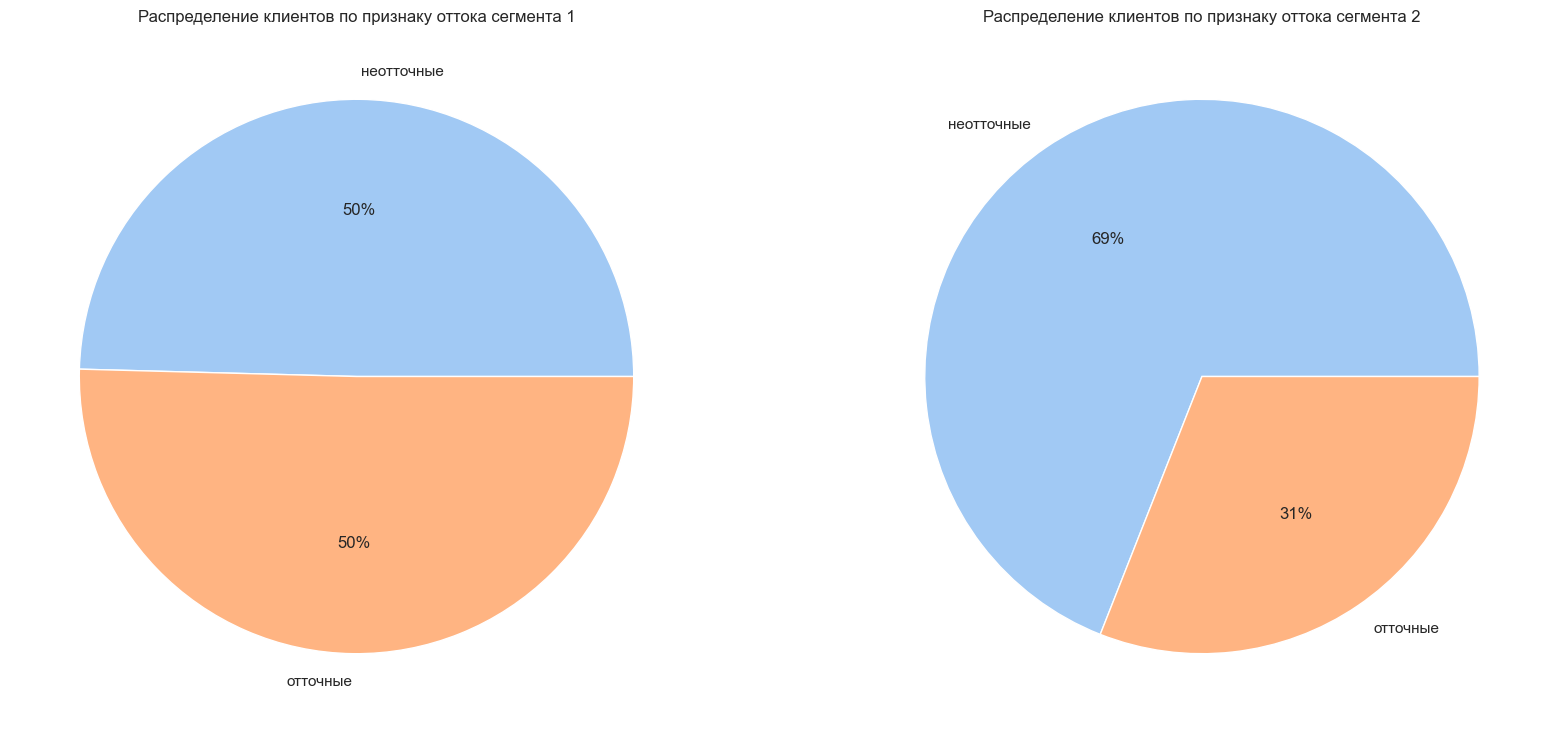

In [144]:
plt.figure(figsize=(20, 9))

plt.subplot(1,2,1)
plt.pie(group_seg1['cnt_users'], labels=group_seg2['churn'], autopct='%.0f%%')
plt.title('Распределение клиентов по признаку оттока сегмента 1')

plt.subplot(1,2,2)
plt.pie(group_seg2['cnt_users'], labels=group_seg2['churn'], autopct='%.0f%%')
plt.title('Распределение клиентов по признаку оттока сегмента 2')
plt.show()

## Шаг 6. Презентация

Презентация: https://drive.google.com/file/d/19yiGpp6jjZ43fu3PYimR0ap7rOxWujli/view?usp=sharing

# Общий вывод и рекомендации
1. **Общая информация**
* в датасете информция о 10 тысячах клиентов по 12 параметрам. Клиенты из городов Рыбнск, Ярославль, Ростов. Доля мужчин и женщин одинаковая. Средний воозраст клинетов 40 лет
2. **Предобработка данных**
* данные были проверены на пропуски и аномалии. Аномалии были удалены, клиенты с пропусков в возрасте тоже удалены, а пропсуки в балансе оставлены, их порядка 30% и заполнять их некорректно
* также была произведена кодировка категориальных колонок: пол и город
3. **Анализ данных**
* признак оттока клиентов больше всего коррелирует с колчиеством продуктов, оценкой собственности клиента, клиенты мужского пола и баллом скоринга
* доля отточных клиентов составляет 18%
* доли отточных и неотточных клиентов по городам очень сходжи
* среди мужчин 24% поддержены оттоку, а среди женщин лишь 13%
* отточные клиенты не старше 76 лет, в то время как неотточные достигают и 86 лет. Доли отточных клиентов выше в возрасте 25-35 и 50-69 лет, во всех остальных возрастах доли остающихся выше
* по баллам скоринга большие доли клиентов с признаком оттока в интервале 825-925
* доли отточных клиентов с эквити больше 3х превышают размер долей неоттточных, там большинство имеют балл 0
* процент отточных клиентов с балансом выше 700 тысяч больше, чем неотточных
* также доли отточных клиентов, имеющих не менее 2х продуктов больше
* среди неотточных клиентов доля имеющая кредитку выше, нежели неотточных
* отточные клиенты чаще были активны в последнее время
* распределение дохода клиентов по признаком схоже, однако доля клиентов с доходом от 100 до 225 тысяч больше у отточных
4. **Проверка гипотез**
* гипотеза о равенстве доходов не была отвергнута, есть вероятность полагать, что средние доходы не имеют сильных отличий
* гипотеза о равенстве скоринга была отвергнута в пользу альтернативной: средний скорринг отточных клиентов выше
* гипотеза о равенстве эквити была также отвергнута в пользу альтернативной: оценка собственности отточных клиентов выше
5. **Сегменты клиентов**
* сегмент 1: 710 клиентов, отток 50%. Мужчины с балом собственности более или равным 5 и с баллом скоринга больше 850. У них хорошая кредитная история, демографические составляющие и, предположительно, есть семьи, учитывая хорошие балл собственности
* сегмент 2: 552 клиента, отток 31%. Клиенты обоих полов, не имеющие кредитной карты со скорингом менее 900 и возрастом до 35, если судить по законодательству - молодежь. У них есть еще куда стремится по баллам скоринга

**Рекомендации:**
1. Для клиентов первого сегмента можно предложить программы лояльности или кэшбеки на магазины для дома и дачи, магазины автозапчастей, автосервисы и похожие вещи
2. Для молодежи из второго сегмента можно предложить оформление кредитной карты с хорошими условиями (процент, дни без процентов) за счет чего у них станет лучше кредитная история и повычится скоринг, или какие-то пониженные проценты по кредитке на оплату обечения или кредит на покупку первой машины

